<a href="https://colab.research.google.com/github/karim-mammadov/SaiKet_Systems_Tasks/blob/main/Task_5_Model_Evaluation_and_Interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 5:**

**Model Evaluation and Interpretation Description:**


Evaluate the best predictive model using the
testing dataset. Interpret model coefficients or
feature importances to comprehend factors
influencing churn. Create ROC curves and
calculate AUC for model performance
assessment.

**Import Libraries**

In [1]:
import pandas as pd

**Load Dataset**

In [2]:
df = pd.read_csv("/content/Telco_Customer_Churn_Dataset  (3).csv")
df = df.drop("customerID", axis=1)

**Handle missing values**

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

**Encode categorical variables**

In [5]:
categorical_cols = [col for col in categorical_cols if col != 'Churn']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

**Encode target**

In [6]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

**Split Dataset**

In [7]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from xgboost import XGBClassifier

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Train Best Model**

**Train a simple XGBoost model without hyperparameter tuning**

In [11]:
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

**Evaluate Model**

In [12]:
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== XGBoost Evaluation ===")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

=== XGBoost Evaluation ===
Accuracy: 0.7849538679914834
Precision: 0.60790273556231
Recall: 0.5347593582887701
F1 Score: 0.5689900426742532


**Feature Importance**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False).head(20)

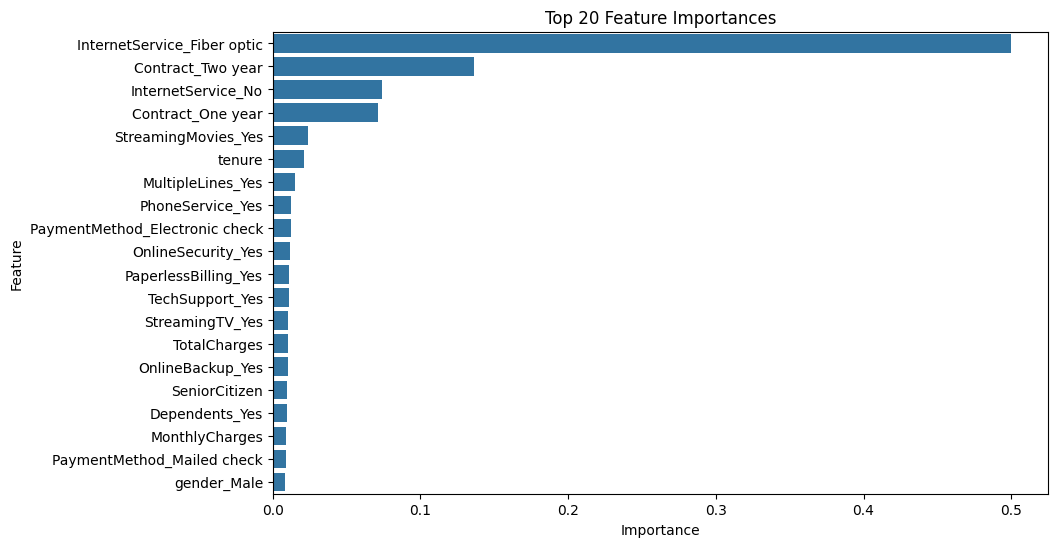

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

**ROC Curve and AUC**

In [17]:
y_prob = xgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

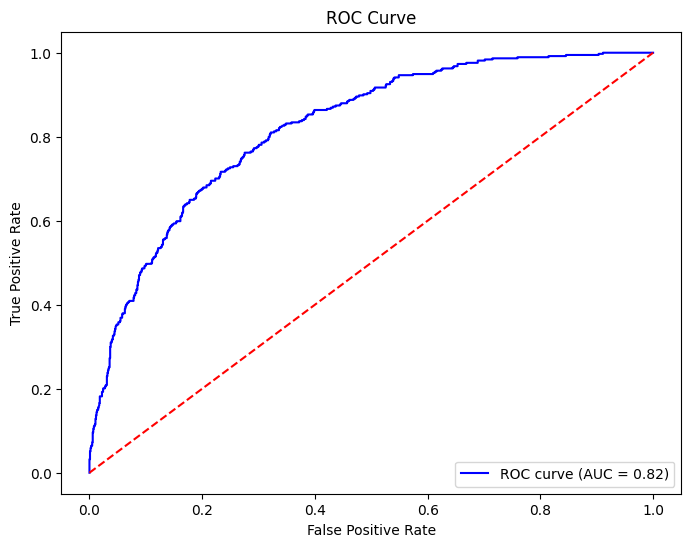

In [18]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

**Hyperparameter Tuning for XGBoost**

In [19]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

**Create XGBoost model**

In [20]:
xgb = XGBClassifier(eval_metric='logloss')

**Hyperparameter grid for tuning**

In [21]:
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

**GridSearchCV for tuning**

In [22]:
xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_params,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

**Fit model on training data**

In [23]:
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.7, 1]},
             scoring='f1', verbose=1)

**Best parameters**

In [24]:
print("Best Parameters:", xgb_grid.best_params_)

Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}


**Evaluate Tuned XGBoost Model**

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

**Get the best estimator**

In [26]:
best_xgb = xgb_grid.best_estimator_

**Predict on test data**

In [27]:
y_pred = best_xgb.predict(X_test)

**Evaluation metrics**

In [29]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== Tuned XGBoost Evaluation ===")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))

=== Tuned XGBoost Evaluation ===
Accuracy: 0.7991483321504613
Precision: 0.6501650165016502
Recall: 0.5267379679144385
F1 Score: 0.5819793205317577
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



**ROC Curve and AUC  (2)**

In [30]:
from sklearn.metrics import roc_curve, auc

**Probabilities for positive class**

In [31]:
y_prob = best_xgb.predict_proba(X_test)[:, 1]

**ROC**

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

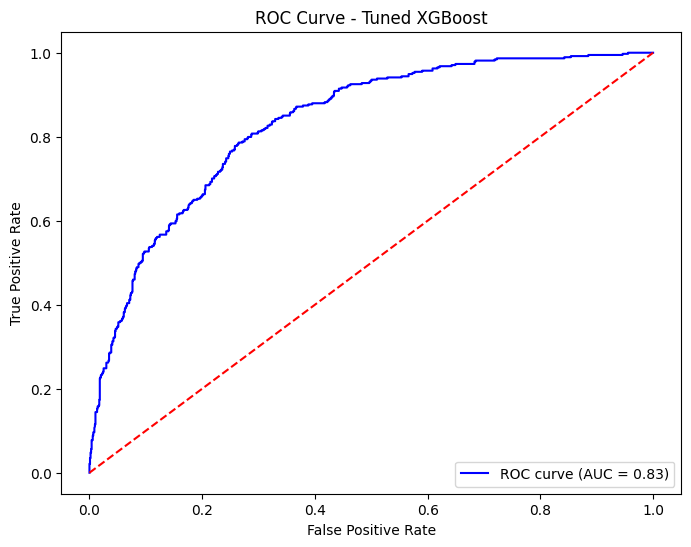

In [33]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned XGBoost')
plt.legend(loc='lower right')
plt.show()

In [34]:
print("AUC:", roc_auc)

AUC: 0.8321488542716164
